In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import os # 모르겠다
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
path = 'C:/Users/tkdal/Desktop/covid19/dataset/'

case = p_info = pd.read_csv(path+'Case.csv')
p_info = pd.read_csv(path+'PatientInfo.csv')
p_route = pd.read_csv(path+'PatientRoute.csv')
time = pd.read_csv(path+'Time.csv')
t_age = pd.read_csv(path+'TimeAge.csv')
t_gender = pd.read_csv(path+'TimeGender.csv')
t_provin = pd.read_csv(path+'TimeProvince.csv')
region = pd.read_csv(path+'Region.csv')
weather = pd.read_csv(path+'Weather.csv')
search = pd.read_csv(path+'SearchTrend.csv')

In [5]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,79,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,24,37.592888,127.056766
2,1000003,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
3,1000004,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
4,1000005,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006


In [6]:
# case csv의 정보
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,79,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,24,37.592888,127.056766
2,1000003,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
3,1000004,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
4,1000005,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006


In [7]:
# case 데이터프레임의 행과 열 갯수
case.shape

(81, 8)

In [8]:
# case 데이터프레임의 정보(데이터타입, 메모리 등)
case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
case_id           81 non-null int64
province          81 non-null object
city              81 non-null object
group             81 non-null bool
infection_case    81 non-null object
confirmed         81 non-null int64
latitude          81 non-null object
longitude         81 non-null object
dtypes: bool(1), int64(2), object(5)
memory usage: 4.6+ KB


In [11]:
# case 데이터프레임의 결측치
case.isnull().sum()

case_id           0
province          0
city              0
group             0
infection_case    0
confirmed         0
latitude          0
longitude         0
dtype: int64

In [12]:
# infection_case 컬럼의 값들 합계 확인
case['infection_case'].value_counts()

etc                                      17
Shincheonji Church                       15
contact with patient                      8
overseas inflow                           5
Guro-gu Call Center                       3
Cheongdo Daenam Hospital                  3
Onchun Church                             2
Seosan-si Laboratory                      2
gym facility in Cheonan                   2
Goesan-gun Jangyeon-myeon                 1
Jin-gu Academy                            1
Bonghwa Pureun Nursing Home               1
Changnyeong Coin Karaoke                  1
River of Grace Community Church           1
Suyeong-gu Kindergarten                   1
Jung-gu Fashion Company                   1
Milal Shelter                             1
Pilgrimage to Israel                      1
Haeundae-gu Catholic Church               1
Gyeongsan Jeil Silver Town                1
Geochang Church                           1
Eunpyeong St. Mary's Hospital             1
Ministry of Oceans and Fisheries

In [23]:
# del case['latitude']
case.drop(['longitude'], axis='columns', inplace=True)

In [16]:
# case_sample.groupby(level=0).agg(['size','sum','mean','min','max'])

# 확진자누적수의 최댓값을 구하면 가장 최근 날짜의 확진자 누적수를 확인 가능
df_location = pd.DataFrame(case.groupby(['infection_case'])['confirmed'].max())
df_location = df_location.sort_values(by=['confirmed'], ascending=False).reset_index()
df_location

,infection_case,confirmed
0,Shincheonji Church,4359
1,etc,1056
2,contact with patient,649
3,Cheongdo Daenam Hospital,119
4,gym facility in Cheonan,104
5,Guro-gu Call Center,79
6,Bonghwa Pureun Nursing Home,58
7,Pilgrimage to Israel,49
8,Onchun Church,34
9,Ministry of Oceans and Fisheries,28


In [22]:
# ggplot을 이용해 그래프를 그리기 위해 plotnine 라이브러리 import
from plotnine import *

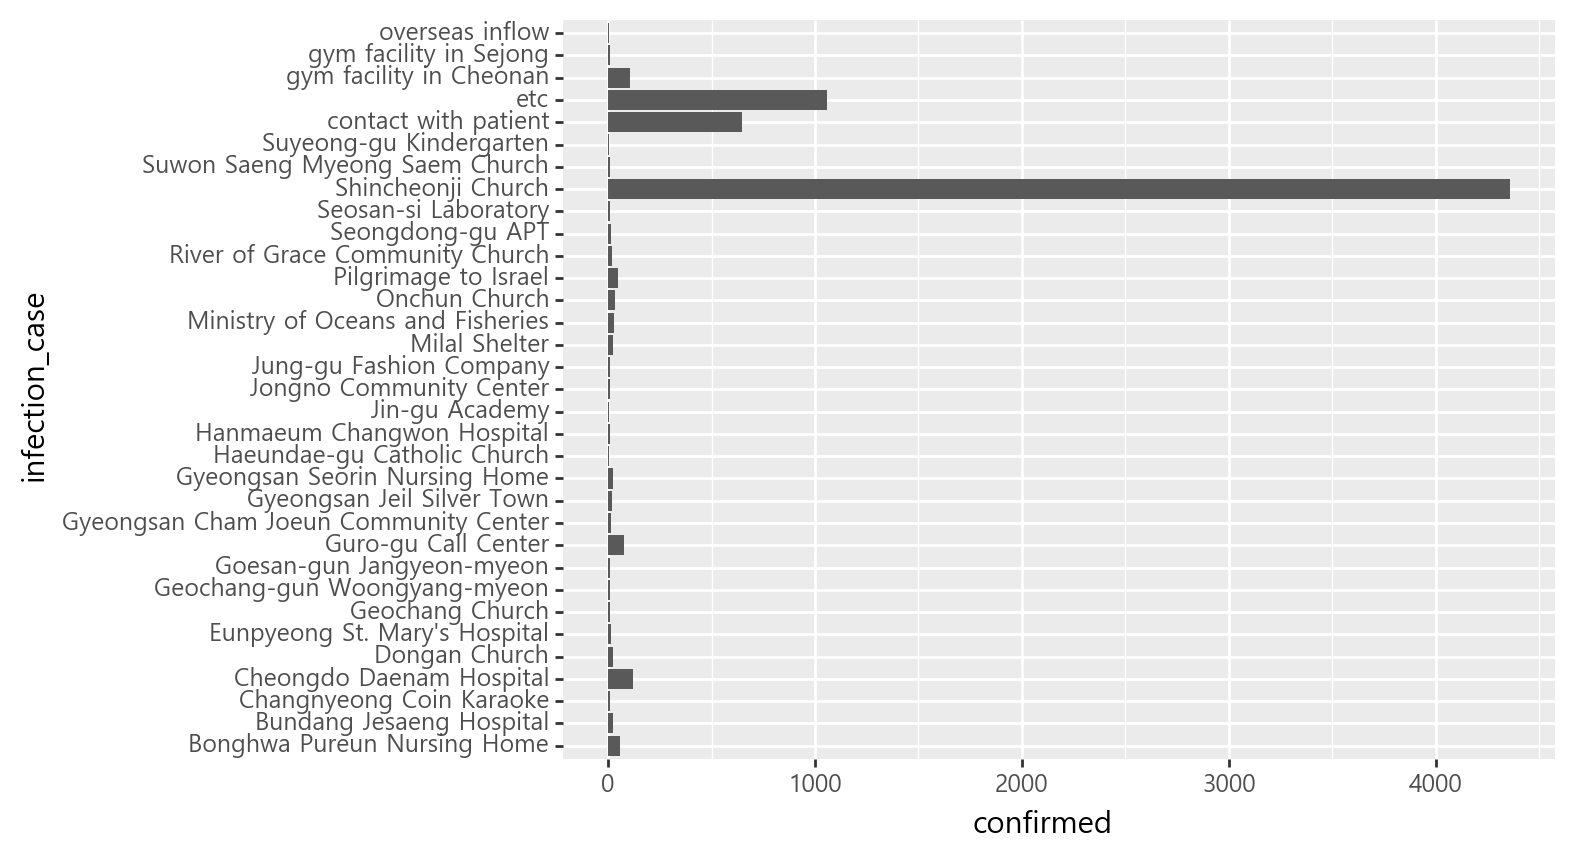

<ggplot: (105640259532)>

In [25]:
(ggplot(df_location)
 +aes(x='infection_case', y='confirmed') 
 +geom_bar(stat='identity', position='dodge')
 +coord_flip()
 +theme(text=element_text(family="Malgun Gothic"))
)

In [37]:
#time 데이터프레임 미리보기  그날 한게 나온 사람 숫자가 아니라 누적자 수(확실치 않음)
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [28]:
# time 데이터프레임 행,열 구성 살펴보기
time.shape

(61, 7)

In [35]:
# 날짜와 검사누적숫자로 이루어진 새로운 데이터프레임 만들기
df_test = time.pivot_table(index='date', values='test', aggfunc=np.sum).reset_index()
df_test

,date,test
0,2020-01-20,1
1,2020-01-21,1
2,2020-01-22,4
3,2020-01-23,22
4,2020-01-24,27
...,...,...
56,2020-03-16,274504
57,2020-03-17,286716
58,2020-03-18,295647
59,2020-03-19,307024


In [38]:
# seaborn으로 그래프를 그리기 위한 라이브러리 import
import seaborn as sns

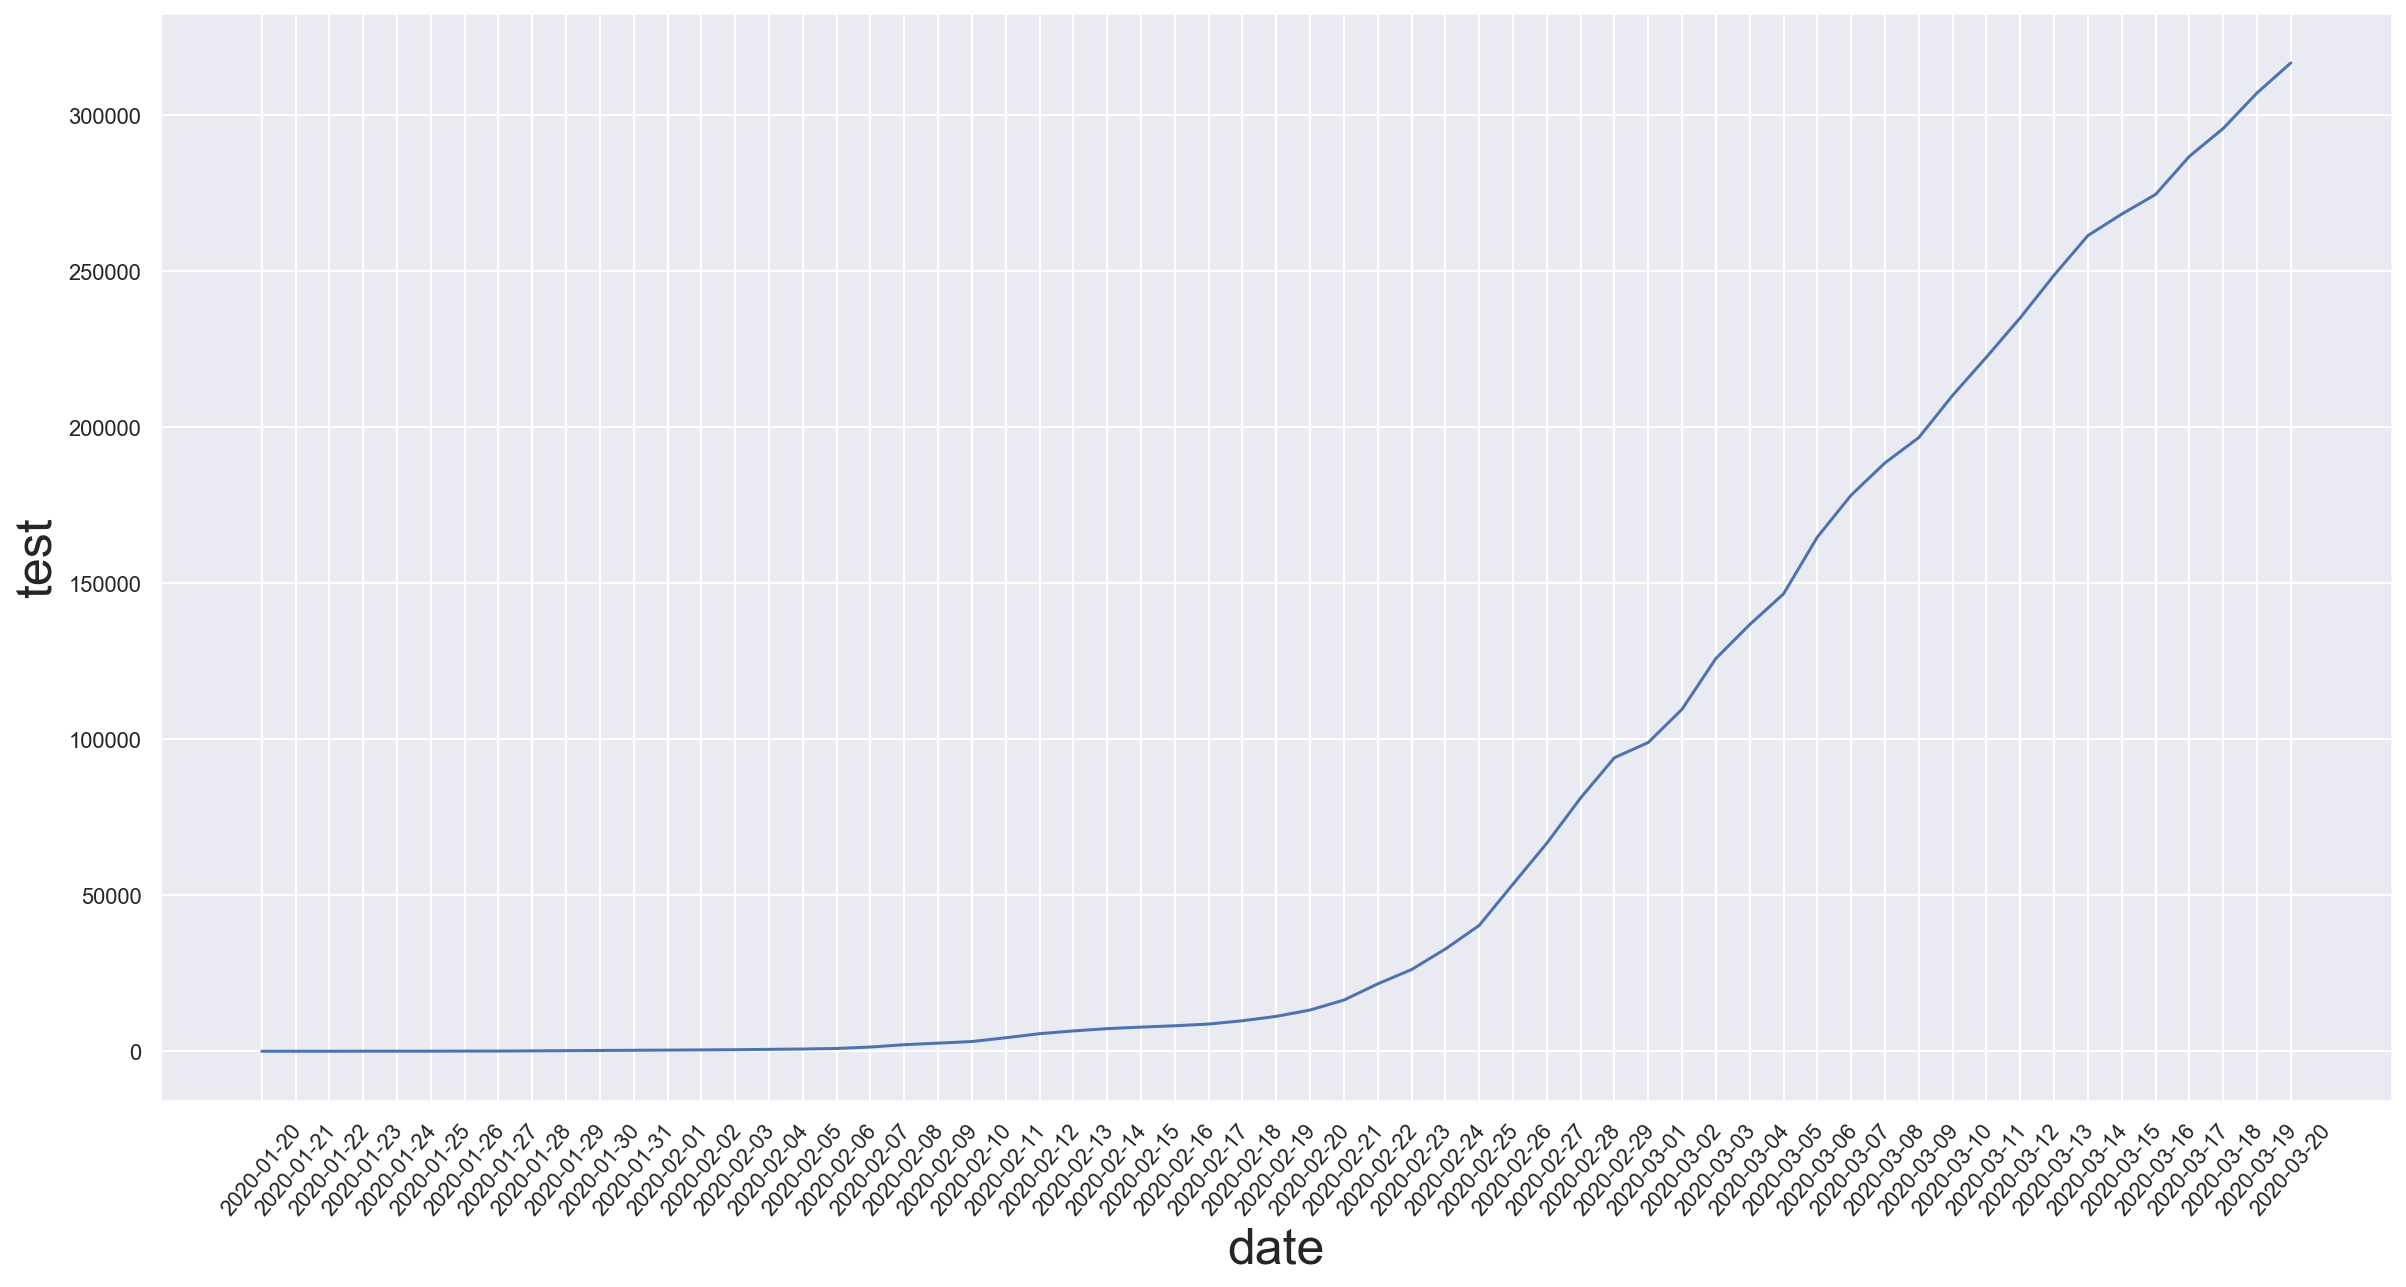

In [47]:
# lineplot을 이용해 시간이 지남에 따라 검사자 누적숫자 추이 그래프 그리기

plt.figure(figsize=(20,10)) #가로 세로 길이
plt.xticks(rotation=50) # x축 라벨들간에 간격
plt.xlabel('date', fontsize=25)
plt.ylabel('test', fontsize=25)
sns.lineplot(data=df_test, x='date', y='test')

In [48]:
# 시간에 따른 음성누적자 수, 새로운 데이터프레임

df_neg = time.groupby(['date'])['negative'].max().reset_index()
df_neg.head()

,date,negative
0,2020-01-20,0
1,2020-01-21,0
2,2020-01-22,3
3,2020-01-23,21
4,2020-01-24,25


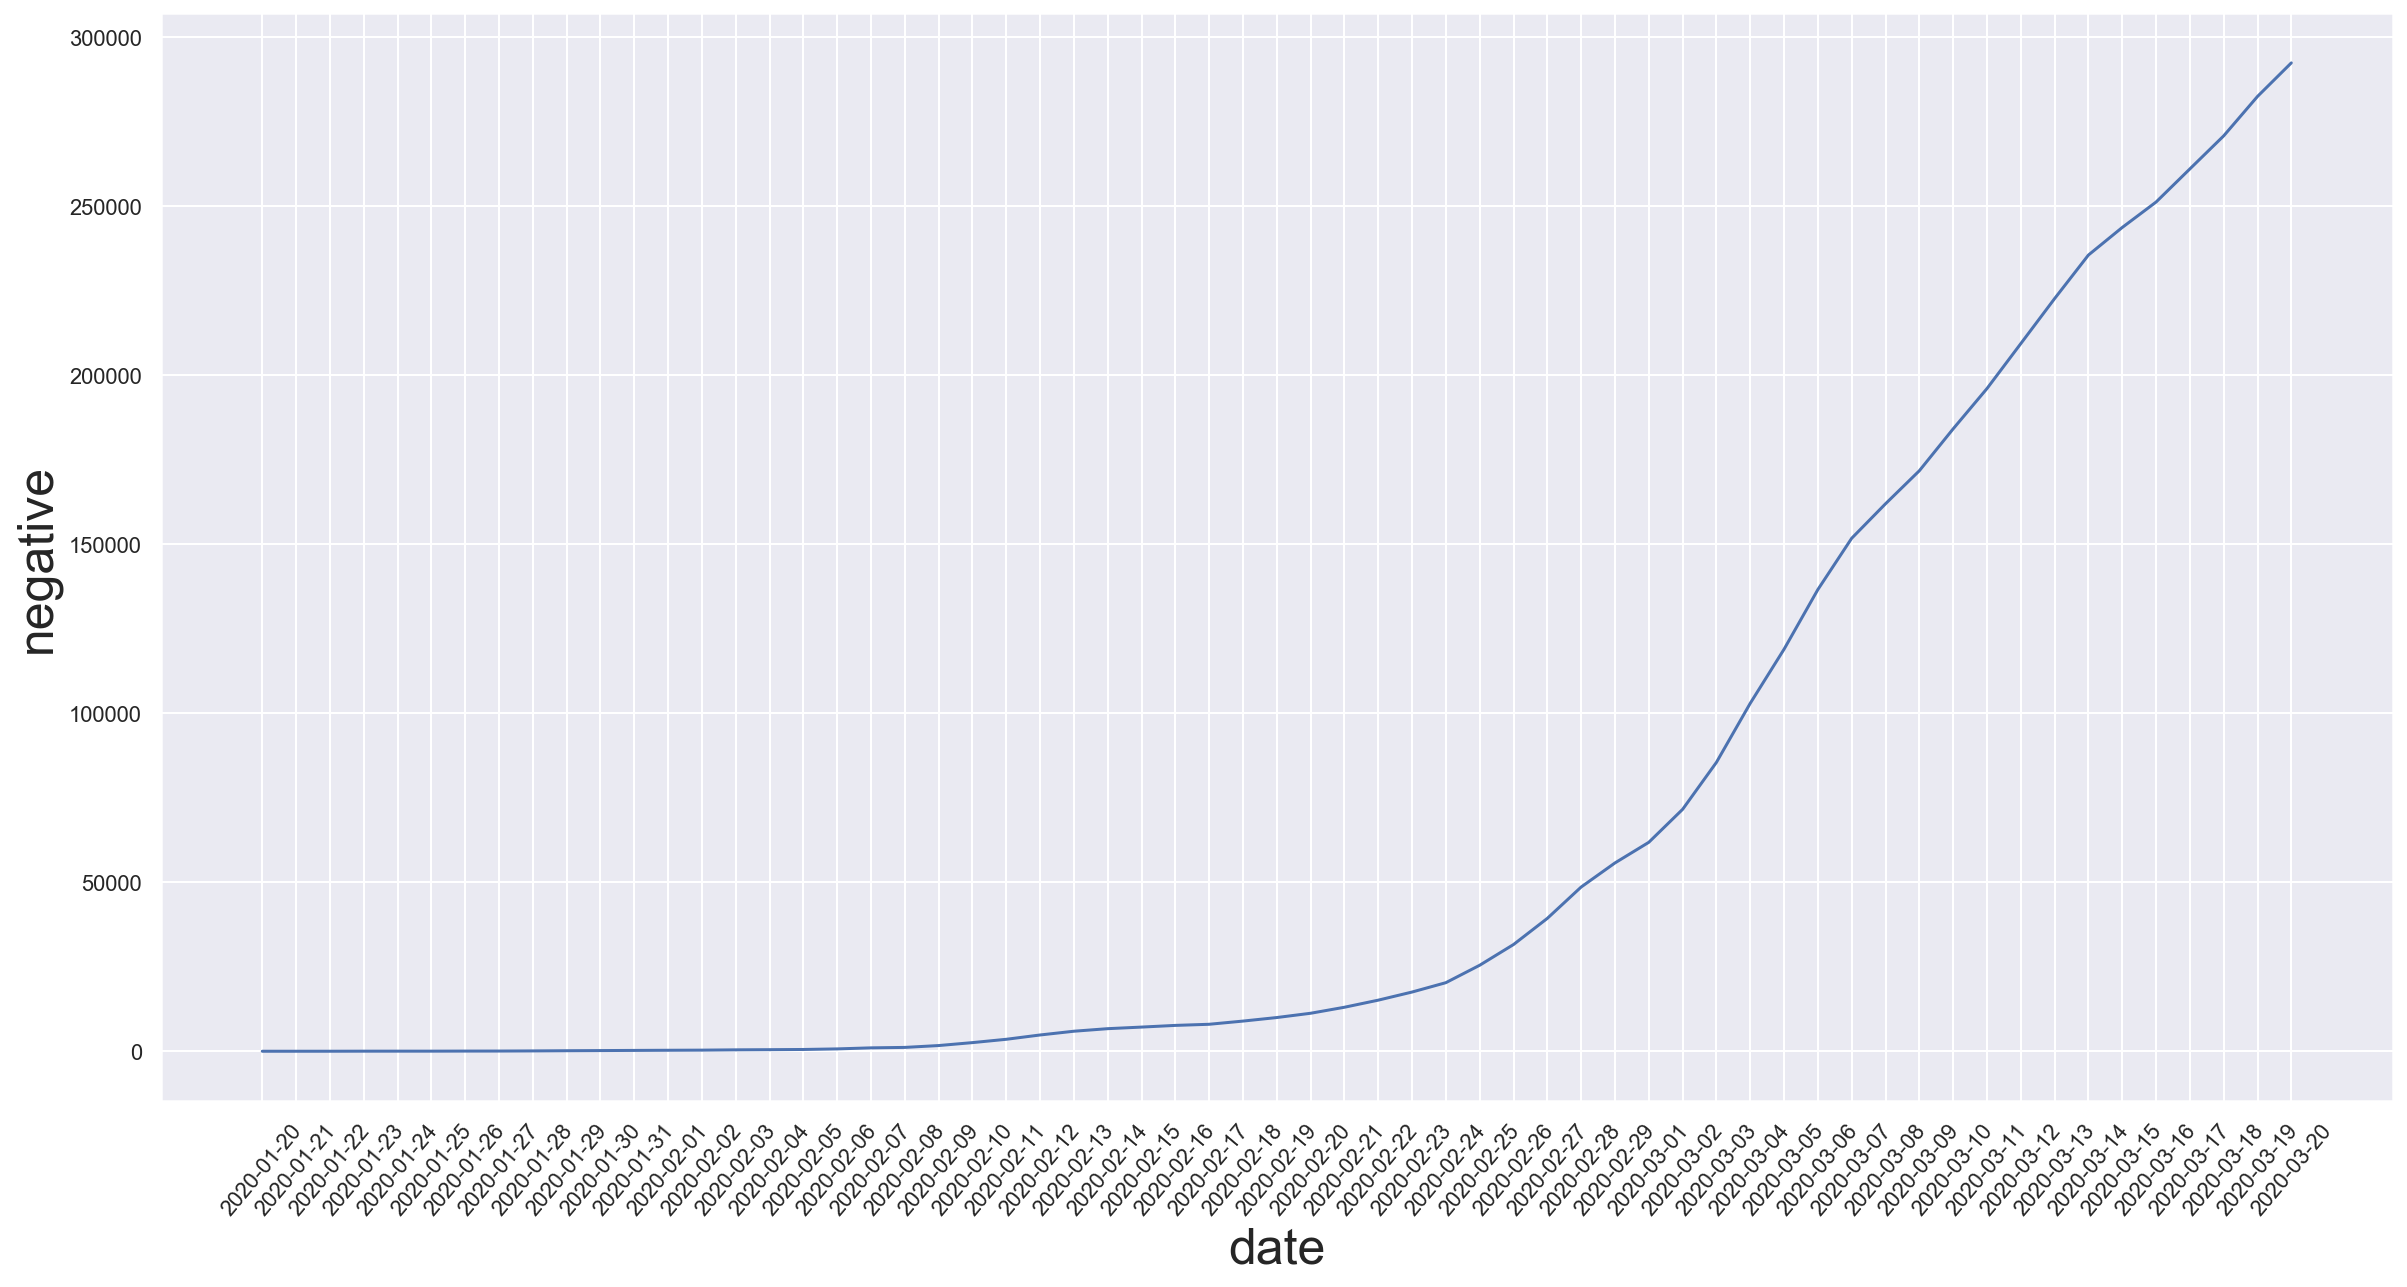

In [50]:
# 시간에 따른 음성누적자 수, 수치 추이 그래프

plt.figure(figsize=(20,10)) #가로 세로 길이
plt.xticks(rotation=50) # x축 라벨들간에 간격
plt.xlabel('date', fontsize=25)
plt.ylabel('negative', fontsize=25)
sns.lineplot(data=df_neg, x='date', y='negative')

In [53]:
# 시간이 지남에 따라 검사결과가 양성으로 나온 사람들 수치 추이 그래프 그리기 위해 새로운 데이터프레임 생성

df_pos = time.groupby(['date'])['confirmed'].max().reset_index()
df_pos.head()

,date,confirmed
0,2020-01-20,1
1,2020-01-21,1
2,2020-01-22,1
3,2020-01-23,1
4,2020-01-24,2


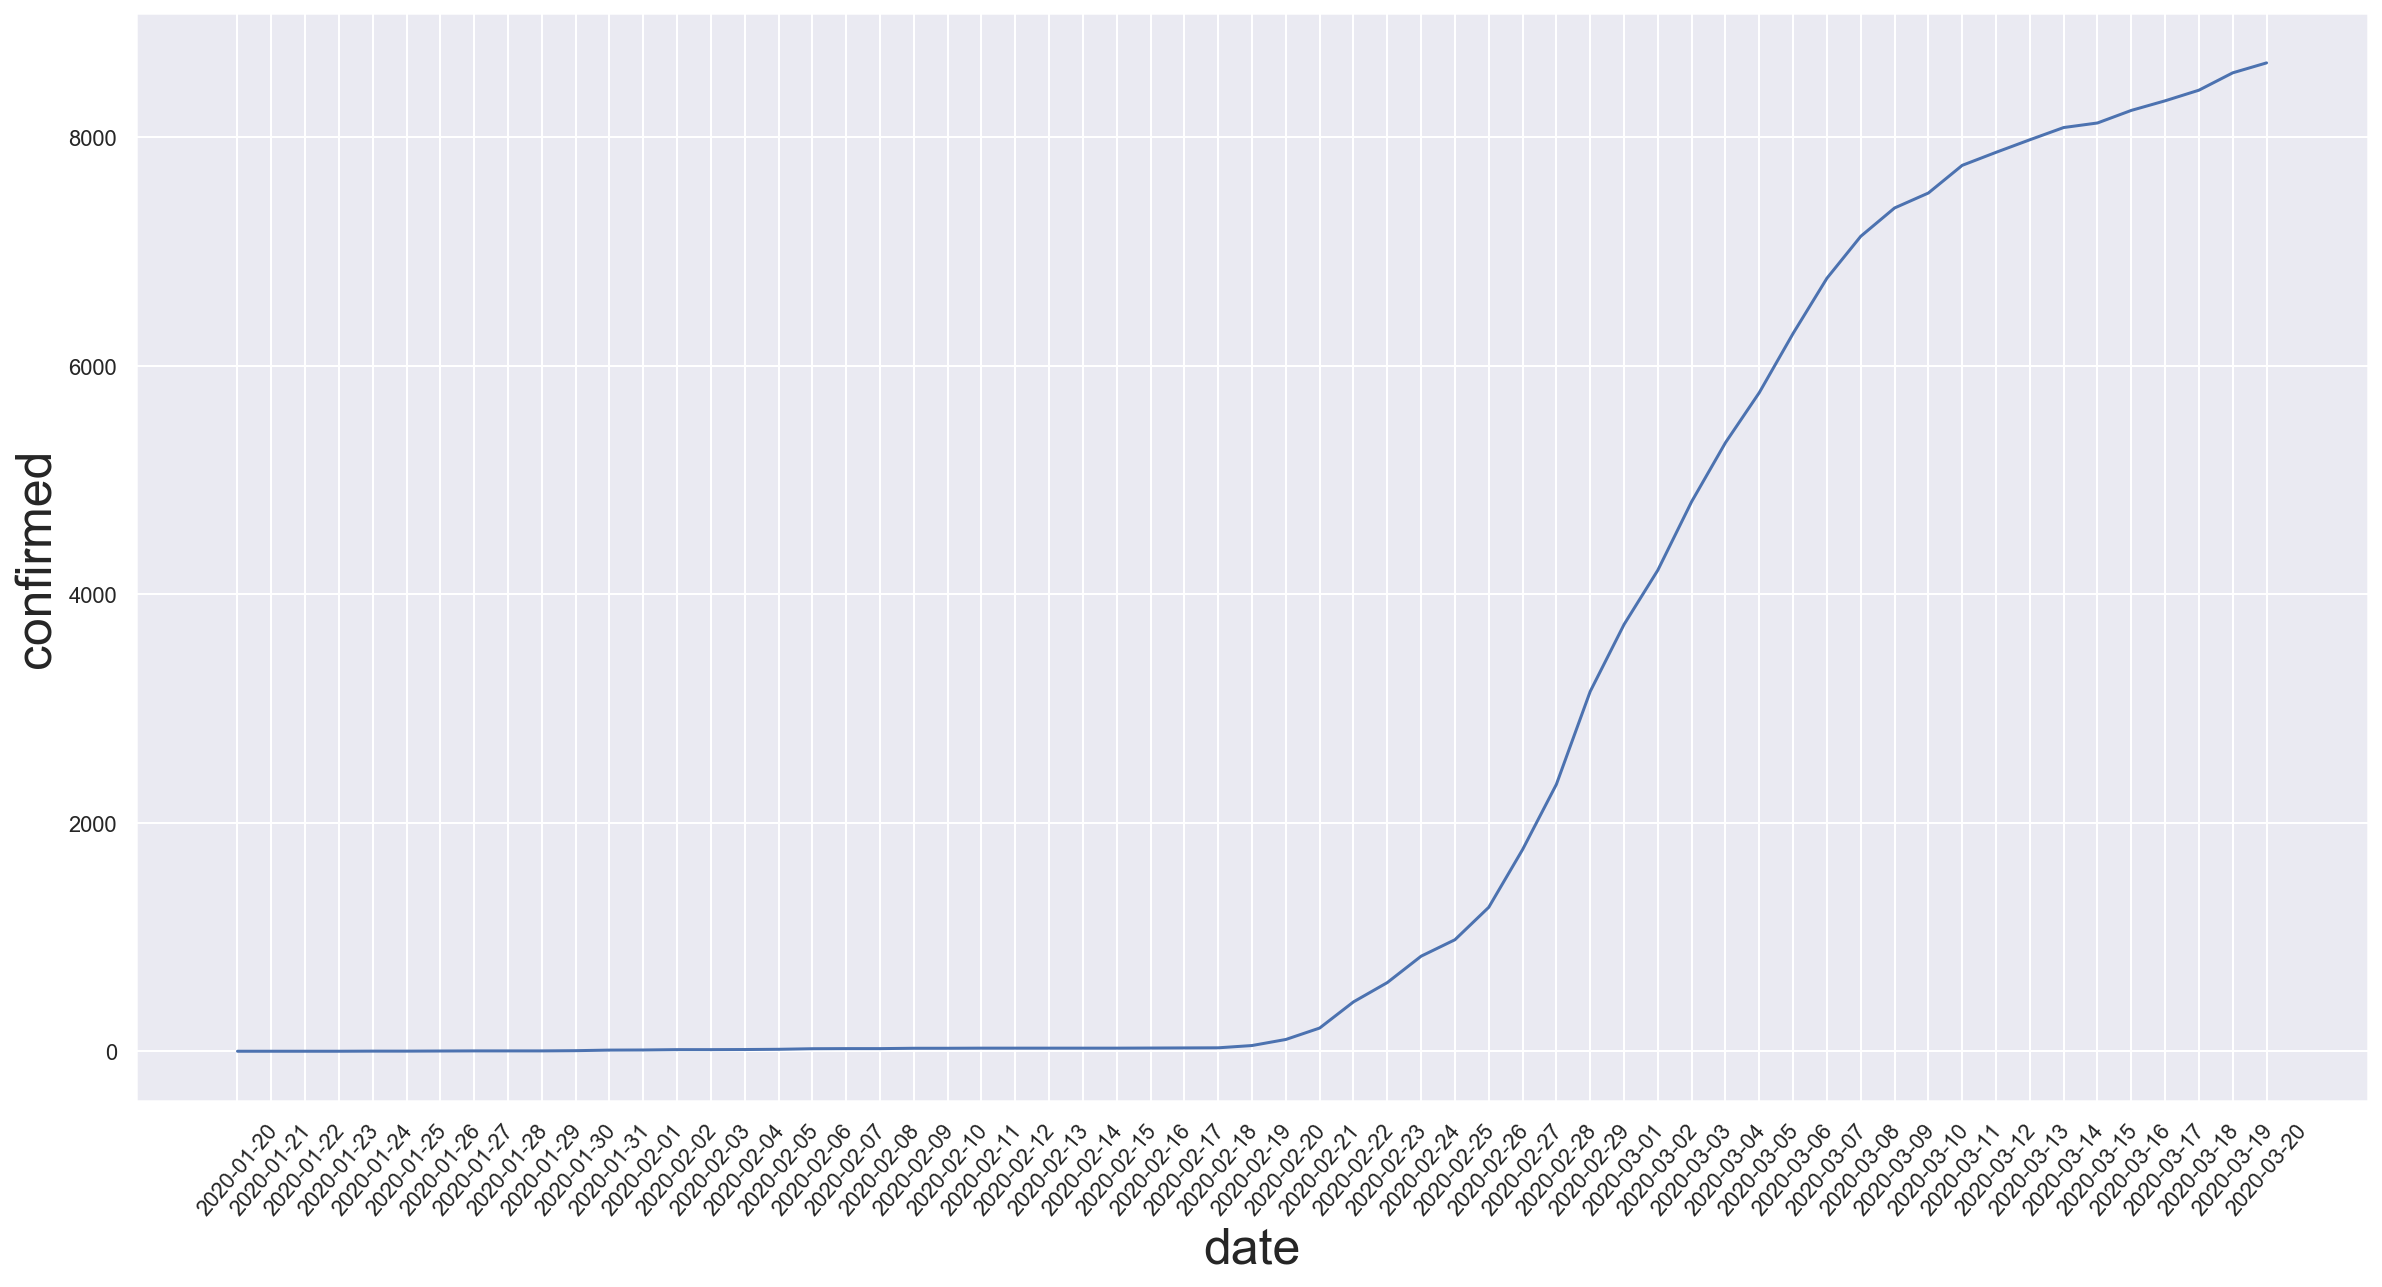

In [54]:
# 시간이 지남에 따라 검사결과가 양성으로 나온 사람들 수치 추이 그래프 그리기

plt.figure(figsize=(20,10))
plt.xticks(rotation=50)
plt.xlabel('date',fontsize=25)
plt.ylabel('confirmed', fontsize=25)
sns.lineplot(data=df_pos, x='date', y='confirmed')